In [ ]:
import pandas as pd
import os
import time
from datetime import datetime

from time import mktime
import matplotlib
import matplotlib.pyplot as plt
# from matplotlib import style
# style.use("dark_background")

import re


path = "./intraQuarter"

def Key_Stats(gather="Total Debt/Equity (mrq)"):
    statspath = path+'/_KeyStats'
    stock_list = [x[0] for x in os.walk(statspath)]
    df = pd.DataFrame(columns = ['Date','Unix','Ticker','DE Ratio'])
    for each_dir in stock_list[1:]:
        each_file = os.listdir(each_dir)
        ticker = each_dir.split("\\")[1]
        if len(each_file) > 0:
            for file in each_file:
                date_stamp = datetime.strptime(file, '%Y%m%d%H%M%S.html')
                unix_time = time.mktime(date_stamp.timetuple())
                full_file_path = each_dir+'/'+file
                source = open(full_file_path,'r').read()
                try:
                    value = float(source.split(gather+':</td><td class="yfnc_tabledata1">')[1].split('</td>')[0])
                    df = df.append({'Date':date_stamp,'Unix':unix_time,'Ticker':ticker,'DE Ratio':value,}, ignore_index = True)
                except Exception as e:
                    pass    
                
        save = gather.replace(' ','').replace(')','').replace('(','').replace('/','')+('.csv')
        print(save)
        df.to_csv(save)
    
            
Key_Stats()

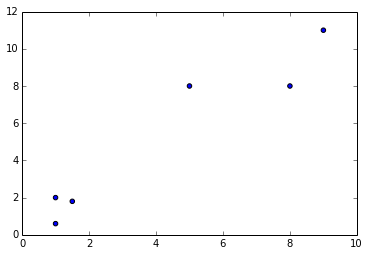

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import style
# style.use("ggplot")
from sklearn import svm
%matplotlib inline


x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

plt.scatter(x,y)
plt.show()


[1]
[1]
[ 0.1380943   0.24462418]


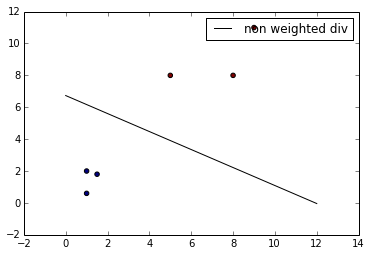

In [20]:

X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])

y = [0,1,0,1,0,1]
clf = svm.SVC(kernel='linear', C = 1.0)

clf.fit(X,y)
print(clf.predict([0.58,10]))
print(clf.predict([10.58,10.76]))

w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()